# Assignment 02
# Pathirana R.P.U.A.
# 190432J


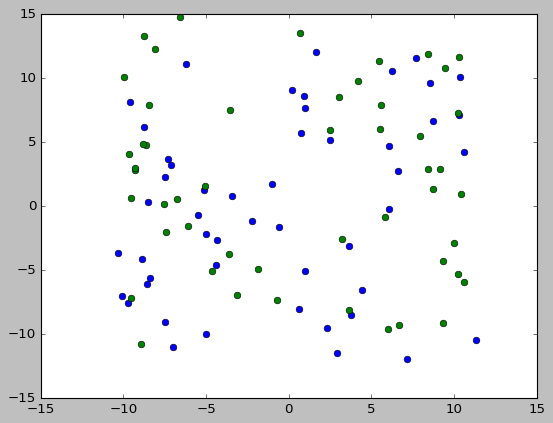

In [29]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import style
style.use('classic')
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0,2*np.pi, half_n)
n = s*np.random.randn(half_n)

x , y = (r+n)*np.cos(t) , (r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m, b = -1,2
x = np.linspace(-12,12,half_n)
y = m*x +b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))




plt.plot(X_circ,X_line, 'o')

newX = X[0:,0]
newY = X[0:,1]



In [ ]:
n = N

u11 = np.sum((newX - np.mean(newX))**2)
u12 = np.sum((newX - np.mean(newX))*(newY - np.mean(newY)))
u21 = u12
u22 = np.sum((newY - np.mean(newY))**2)

U = np.array([[u11,u12],[u21,u22]])
W,V = np.linalg.eig(U)
ev_corresponding_to_smallest_ev = V[:,np.argmin(W)] 

a = ev_corresponding_to_smallest_ev[0]
b = ev_corresponding_to_smallest_ev[1]
d = a*np.mean(newX) + b*np.mean(newY)

mstar = -a/b
cstar = d/b

plt.plot(x,y,'o',label='Noisy points')
plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1] + c], color='g',linewidth=2, label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0] + cstar,mstar*x[-1] + cstar], color='r', linewidth=2,label=r'Estimated line')
plt.legend(loc = 'best')
plt.show()

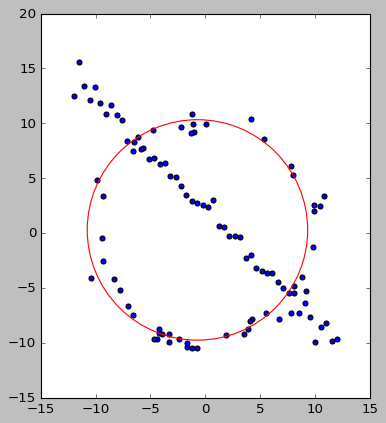

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

def data_generator():
	N = 100
	half_n = N//2
	r = 10
	s = r/16
	t = np.random.uniform(0,2*np.pi, half_n)
	n = s*np.random.randn(half_n)

	x , y = (r+n)*np.cos(t) , (r+n)*np.sin(t)
	X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
	m, b = -1,2
	x = np.linspace(-12,12,half_n)
	y = m*x +b + s*np.random.randn(half_n)
	X_line = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
	X = np.vstack((X_circ,X_line))


	return X[0:,0], X[0:,1]

def circle_func(a, b, r, x):
	return (np.sqrt(r**2-(x-a)**2) + b, -np.sqrt(r**2-(x-a)**2) + b)

class RANSAC:
	def __init__(self, x_data, y_data, n):
		self.x_data = x_data
		self.y_data = y_data
		self.n = n
		self.d_min = 99999
		self.best_model = None

	def random_sampling(self):
		sample = []
		save_ran = []
		count = 0

		# get three points from data
		while True:
			ran = np.random.randint(len(self.x_data))

			if ran not in save_ran:
				sample.append((self.x_data[ran], self.y_data[ran]))
				save_ran.append(ran)
				count += 1

				if count == 3:
					break

		return sample

	def make_model(self, sample):
		# calculate A, B, C value from three points by using matrix
	
		pt1 = sample[0]
		pt2 = sample[1]
		pt3 = sample[2]

		A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
		B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
		inv_A = inv(A)

		c_x, c_y = np.dot(inv_A, B) / 2
		c_x, c_y = c_x[0], c_y[0]
		r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)

		return c_x, c_y, r

	def eval_model(self, model):
		d = 0
		c_x, c_y, r = model

		for i in range(len(self.x_data)):
			dis = np.sqrt((self.x_data[i]-c_x)**2 + (self.y_data[i]-c_y)**2)

			if dis >= r:
				d += dis - r
			else:
				d += r - dis
		
		return d

	def execute_ransac(self):
		# find best model
		for i in range(self.n):
			model = self.make_model(self.random_sampling())
			d_temp = self.eval_model(model)
			
			if self.d_min > d_temp:
				self.best_model = model
				self.d_min = d_temp


if __name__ == '__main__':
	# make data
	x_data, y_data = data_generator()

	# show data by scatter type
	plt.scatter(x_data, y_data, c='blue', marker='o', label='data')

	# make ransac class
	# n: how many times try sampling
	ransac = RANSAC(x_data, y_data, 50)
	
	# execute ransac algorithm
	ransac.execute_ransac()
	
	# get best model from ransac
	a, b, r = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]

	# show result
	circle = plt.Circle((a, b), radius=r, color='r', fc='y', fill=False)
	plt.gca().add_patch(circle)

	plt.axis('scaled')

	# plt.tight_layout()
	plt.show()

In [32]:
# Libraries
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt


In [ ]:
# Returns co-ordinate points of circles 
def GetCirclePoints(center, r):
    theta = np.linspace(0,2*np.pi,100)
    x = center[0] + r*np.cos(theta)
    y = center[0] + r*np.sin(theta)

    return(x,y)
    